# Assignment - 3 - Calibration of Models

### - Ashish Tara Shivakumar Ireddy - J42325c

###  -------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Importing Libs

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit
import math
import numpy as np
from scipy.optimize import minimize
from scipy.integrate import odeint
from sklearn.metrics import r2_score
from scipy.optimize import least_squares
from numpy.random import default_rng
import seaborn as sns
sns.set(style="darkgrid")

#### Data

In [2]:
df = pd.read_csv("Assignment_3.csv")


In [3]:
df

,x,y
0,1,35.834888
1,2,34.315693
2,3,34.736127
3,4,34.989171
4,5,32.166988
5,6,32.760831
6,7,31.860935
7,8,31.856401
8,9,28.235062
9,10,27.083336


In [4]:
xdata = np.asarray(df["x"])
ydata = np.asarray(df["y"])

#### Initial plot

<Figure size 640x480 with 0 Axes>

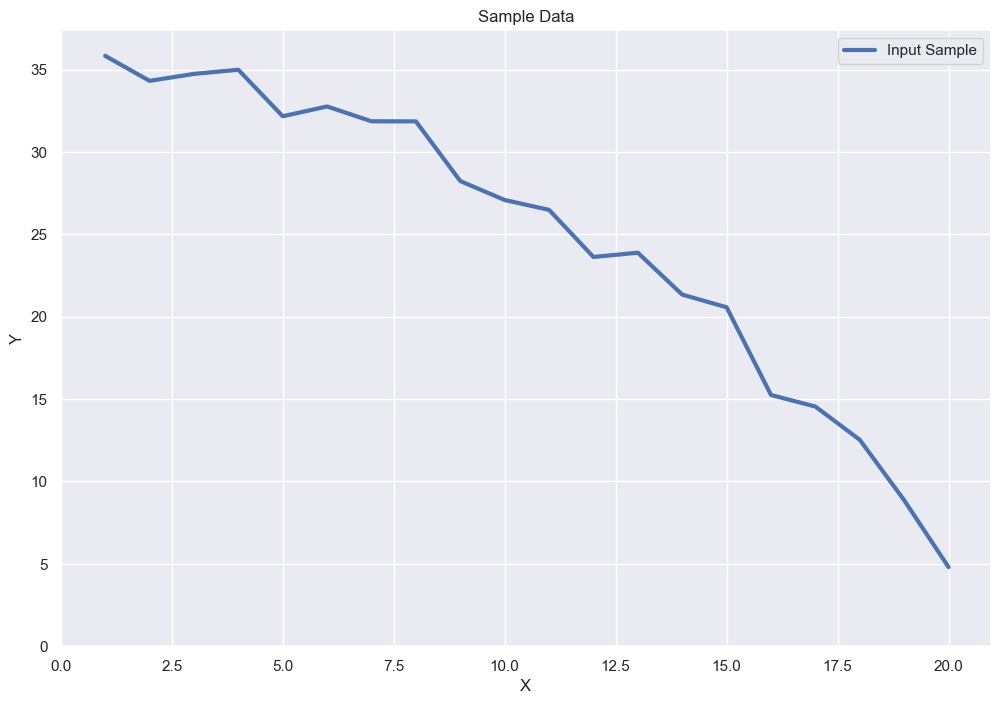

In [73]:
plt.figure(facecolor='w')
plt.figure(figsize = (12,8), dpi = 100)
plt.plot(xdata, ydata, c = 'b', lw = 3, label='Input Sample')
plt.xlim(0)
plt.ylim(0)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Sample Data")
plt.legend()
plt.show()

###  -------------------------------------------------------------------------------------------------------------------------------------------------------------------

# •Exponential function
### y = C1 * exp(C2*x) + C3

# •Differential model 
### dx/dt = K1*x – K2

# •Difference model: 
### x(t + 1) = L1 * x(t) - L2

###  -------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Exponential Function

In [19]:
def expo(x,c1,c2,c3):
    y = (c1*(np.exp(c2*x))) + c3
    return y

In [20]:
parameters, covariance  = curve_fit(expo, xdata, ydata, method = 'trf')#, p0 = guess)

In [24]:
e = expo(xdata, *parameters)

In [25]:
e

array([35.83242977, 35.25260782, 34.61310449, 33.90777672, 33.12984917,
       32.27184911, 31.32553462, 30.28181546, 29.13066571, 27.86102748,
       26.46070467, 24.91624587, 23.21281506, 21.33404918, 19.26190088,
       16.9764652 , 14.45578837, 11.67565687,  8.60936489,  5.22745778])

In [23]:
parameters

array([-5.10742696,  0.09797078, 41.46556702])

In [29]:
c1 = parameters[0]
c2 = parameters[1]
c3 = parameters[2]

In [86]:
r2_expo = r2_score(ydata,e)
r2_score(ydata,e)

0.9909813089162104

<Figure size 640x480 with 0 Axes>

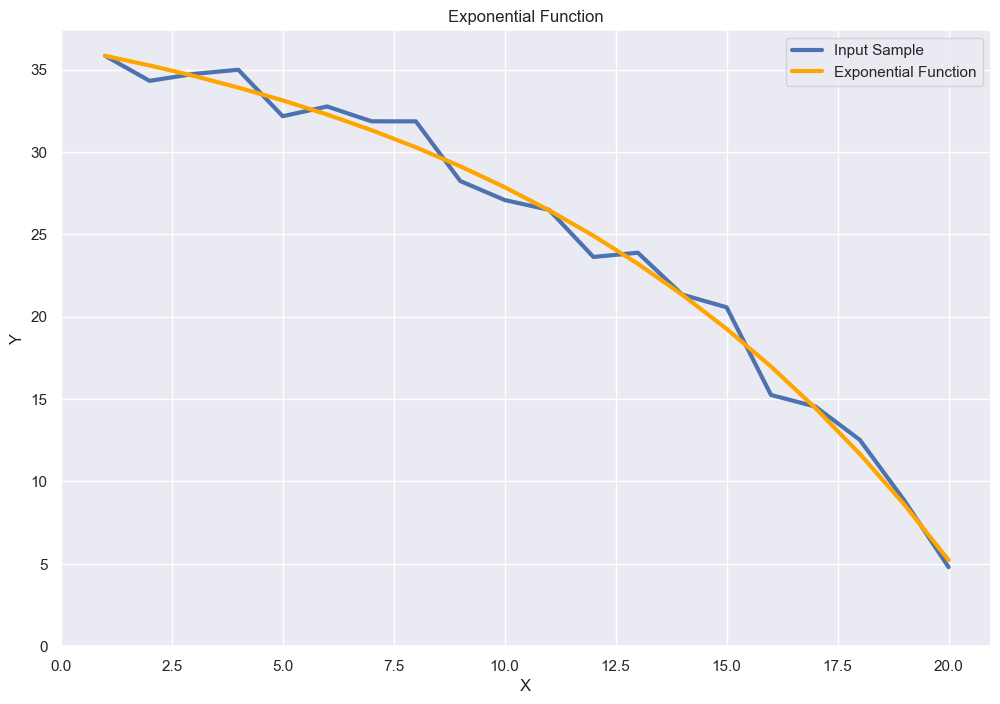

In [87]:
plt.figure(facecolor='w')
plt.figure(figsize = (12,8), dpi = 100)
plt.plot(xdata, ydata, c = 'b', lw = 3, label='Input Sample')
plt.plot(xdata, e, c = 'orange', lw = 3, label='Exponential Function')
plt.xlim(0)
plt.ylim(0)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Exponential Function")
plt.legend()
plt.show()

###  -------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Difference Model

In [42]:
def difference(x, y, l1, l2, itr):
    
    if itr!= 0:
        sol = (l1*difference(x, y, l1, l2, itr-1)) - l2
        y.append(sol)
        return sol
    else:
        x == 0
        return x

In [43]:
def MSE_DIFMOD_function(p2, in_x2, in_y2):
    
    y_fin = []

    difference(p2[2], y_fin, p2[0], p2[1], len(in_x2))
        
    MSE = np.square(np.subtract(in_y2, y_fin)).mean()
    
    return MSE

In [80]:
y_n = []
guess_Differen = [0, 1, 1.5]

In [81]:
optimize.minimize(MSE_DIFMOD_function, guess_Differen, args=(xdata, ydata)).x

array([ 1.10291647,  4.26769299, 36.35859932])

In [82]:
l1_n = optimize.minimize(MSE_DIFMOD_function, guess_Differen, args=(xdata, ydata)).x[0]
l2_n = optimize.minimize(MSE_DIFMOD_function, guess_Differen, args=(xdata, ydata)).x[1]
xd_n = optimize.minimize(MSE_DIFMOD_function, guess_Differen, args=(xdata, ydata)).x[2]

In [83]:
difference(xd_n, y_n, l1_n, l2_n, len(xdata))

5.227938771003656

In [88]:
r2_difference = r2_score(ydata, y_n)
r2_score(ydata, y_n)

0.9909813079330748

<Figure size 640x480 with 0 Axes>

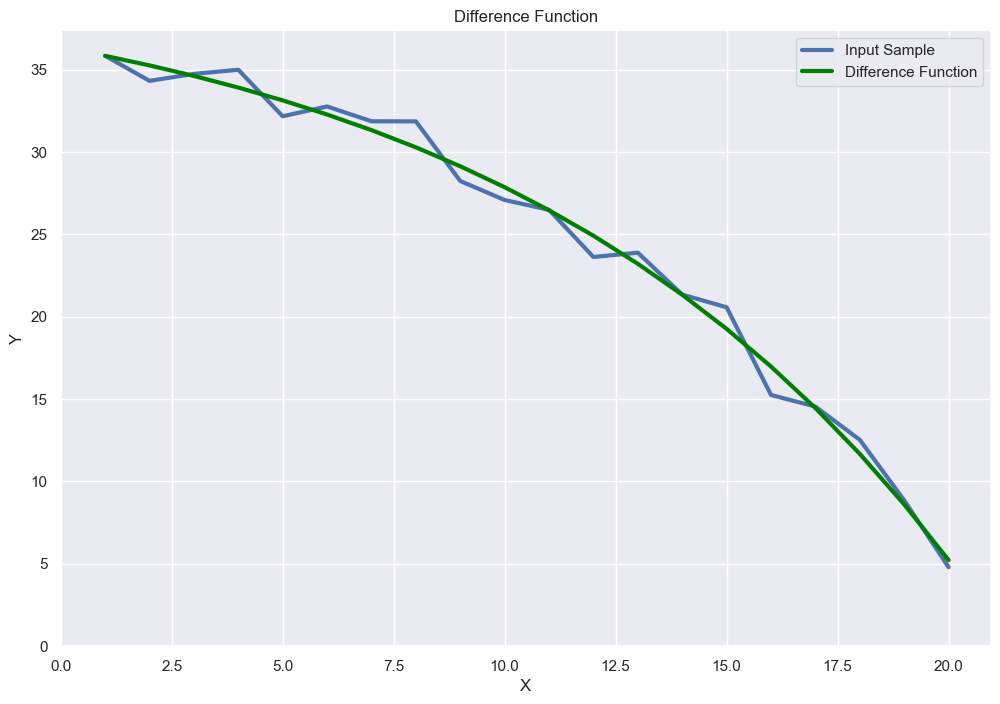

In [89]:
plt.figure(facecolor='w')
plt.figure(figsize = (12,8), dpi = 100)
plt.plot(xdata, ydata, c = 'b', lw = 3, label='Input Sample')
plt.plot(xdata, y_n, c = 'green', lw = 3, label='Difference Function')
plt.xlim(0)
plt.ylim(0)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Difference Function")
plt.legend()
plt.show()

###  -------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Differential Model 

In [32]:
def differential(x, t, k1, k2):
    y = [(k1*x) - k2 for x in x]
    return y

In [33]:
def MSE_loss_function(p, in_x, in_y):
    # x, k1, k2
    indi = odeint(differential, p[2], in_x, args=(p[0], p[1])).reshape(-1)
        
    MSE = np.square(np.subtract(in_y, indi)).mean()
    
    return MSE

In [34]:
guess_Differ = [0, 1, 2] 

In [35]:
minimize(MSE_loss_function, guess_Differ,args=(xdata, ydata)).x

array([ 0.09796103,  4.0621623 , 35.83277039])

In [37]:
k1_n = minimize(MSE_loss_function, guess_Differ,args=(xdata, ydata)).x[0]
k2_n = minimize(MSE_loss_function, guess_Differ,args=(xdata, ydata)).x[1]
x_n = minimize(MSE_loss_function, guess_Differ,args=(xdata, ydata)).x[2]

In [38]:
f = odeint(differential, x_n, xdata, args=(k1_n, k2_n))

In [90]:
r2_differential = r2_score(ydata,f)
r2_score(ydata,f)

0.9909813088973939

<Figure size 640x480 with 0 Axes>

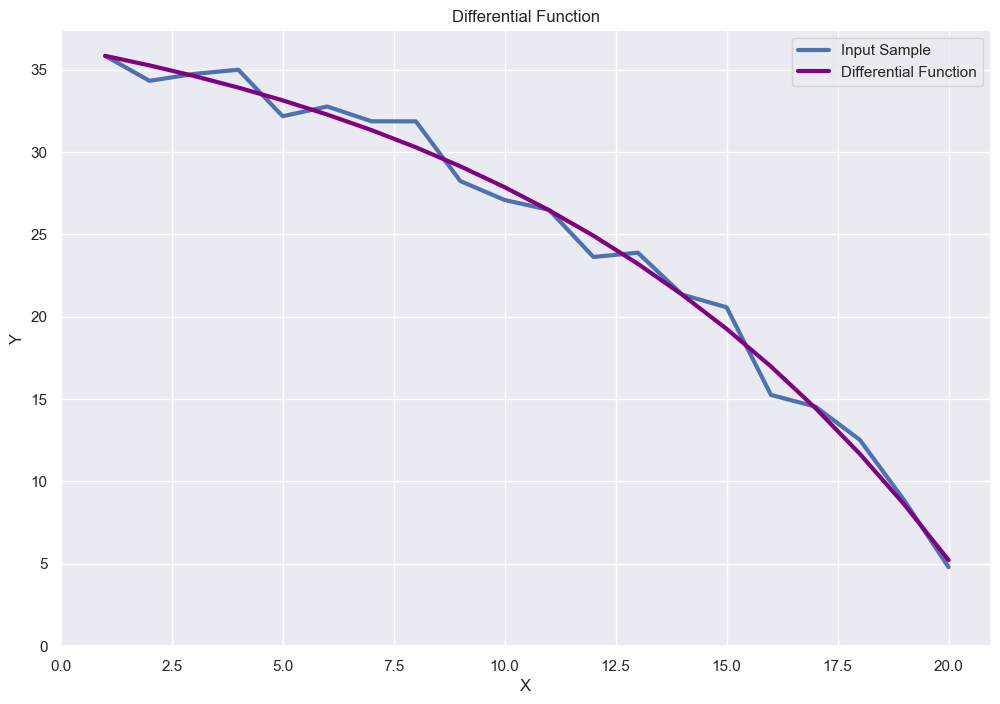

In [91]:
plt.figure(facecolor='w')
plt.figure(figsize = (12,8), dpi = 100)
plt.plot(xdata, ydata, c = 'b', lw = 3, label='Input Sample')
plt.plot(xdata, f, c = 'purple', lw = 3, label='Differential Function')
plt.xlim(0)
plt.ylim(0)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Differential Function")
plt.legend()
plt.show()

###  -------------------------------------------------------------------------------------------------------------------------------------------------------------------

# R2 - Scores 

In [109]:
R2 = pd.DataFrame({'R2 Score': [r2_expo, r2_difference, r2_differential]},
             index = ['Exponential', 'Difference', 'Differentail'])

In [110]:
R2

,R2 Score
Exponential,0.990981
Difference,0.990981
Differentail,0.990981


# Parameters

In [123]:
Exponential = pd.DataFrame({'Parameters': [c1, c2, c3]},
             index = ['C1', 'C2', 'C3'])

In [124]:
Difference = pd.DataFrame({'Parameters': [l1_n, l2_n]},
             index = ['L1', 'L2'])

In [125]:
Differential = pd.DataFrame({'Parameters': [k1_n, k2_n]},
             index = ['K1', 'K2'])

In [127]:
pd.concat([Exponential, Difference, Differential], keys = ['Exponential','Difference','Differential'])

Parameters
Exponential  C1   -5.107427
             C2    0.097971
             C3   41.465567
Difference   L1    1.102916
             L2    4.267693
Differential K1    0.097961
             K2    4.062162

###  -------------------------------------------------------------------------------------------------------------------------------------------------------------------

###  -------------------------------------------------------------------------------------------------------------------------------------------------------------------